# COVID-19 DATA ANALYSIS 

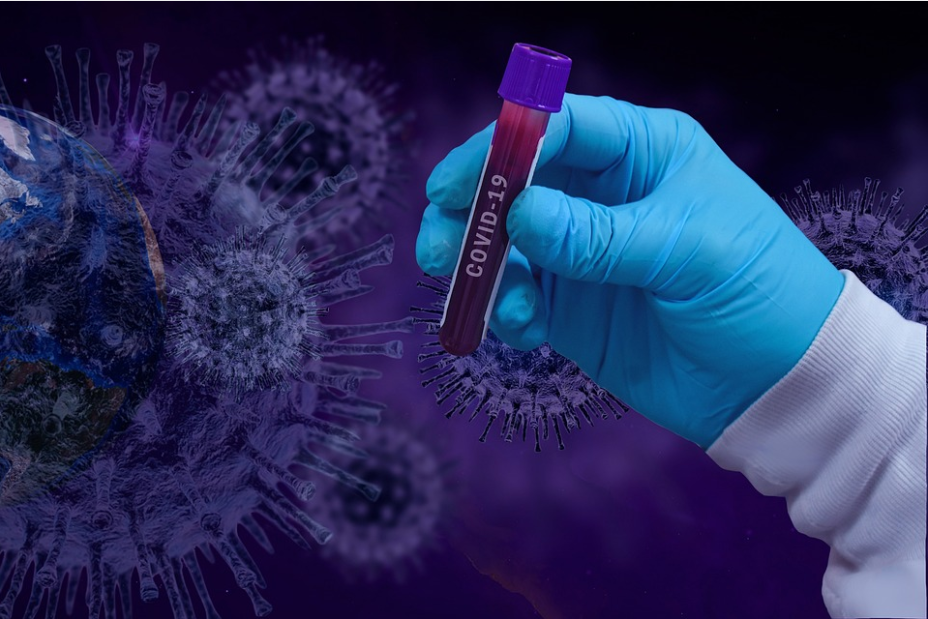

## Introduction
- The COVID-19 pandemic in Kenya is part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus was confirmed to have reached Kenya on 12 March 2020, with the initial cases reported in the capital city Nairobi and in the coastal area Mombasa.
- On 12 January 2020, the World Health Organization (WHO) confirmed that a novel coronavirus was the cause of a respiratory illness in a cluster of people in Wuhan City, Hubei Province, China, which was reported to the WHO on 31 December 2019.
- Kenya has so far experienced seven waves of COVID-19: `(1) July–September 2020; (2) October 2020–January 2021; (3) February–July 2021; (4) August–October 2021; (5) November 2021–January 2022; (6) June–July 2022; (7) November–December 2022.`


## Data
Confirmed cases by county in Kenya are based on the county of detection and data is sourced from media releases by the Ministry of  Health, Kenya. 

### Import Relevant Libraries

In [ ]:
#import libraries 
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

import seaborn as sns
#import folium

# Import matplotlib for visualization
import matplotlib.pyplot as plt
import numpy as np 

#geocoding libraries
import geopy
from geopandas. tools import geocode

#set dislay Options
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',200)
pd.set_option('display.width',1000)
# Enable inline plotting
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

### Read and import Data

##### COVID-19 cases in Kenya

In [ ]:
#read covid-19 kenya data from csv, excel and shaefile
covid_cases_kenya= pd.read_csv('Data_kenya\Corona_Cases_Kenya_spatiality.csv')
covid_cases_kenya.tail()

OBJECTID     Report_Date  Confirmed_New  Confirmed_Total  Recovered_New  Recovered_Total  Deaths_New  Deaths_Total  Active_Total  Tested  Tested_Total  Positive_Test_Rate
1042      1043  1/20/2023 0:00             11           342771              9           336952         0.0          5688           131   474.0     3965131.0            0.023207
1043      1044  1/21/2023 0:00             11           342782             22           336974         0.0          5688           120   389.0     3965520.0            0.028278
1044      1045  1/22/2023 0:00              3           342785             24           336998         0.0          5688            99   112.0     3965632.0            0.026786
1045      1046  1/23/2023 0:00              1           342786              9           337007         0.0          5688            91   133.0     3965765.0            0.007519
1046      1047  1/24/2023 0:00              6           342792             28           337035         0.0          5688            69   427.0     3966192.0            0.014052

##### COVID-19 cases in Kenya per county

In [ ]:
covid_cases_per_county = pd.read_excel("Data_kenya\Corona_Cases_County.xlsx")
covid_cases_per_county.head(5)

OBJECTID      County  County#    Pop2019  CasesPer10K Last_Update   27-Dec  28-Dec  29-Dec  30-Dec  ...  17-Jan  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed
0      48.0     Mombasa      1.0  1208333.0   151.299352  2023-01-25  18280.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     NaN      18282
1      49.0       Kwale      2.0   866820.0    15.931797  2023-01-25   1381.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       1381
2      50.0      Kilifi      3.0  1453787.0    51.953966  2023-01-25   7551.0     NaN     NaN     NaN  ...     1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       7553
3      51.0  Tana River      4.0   315943.0    15.034357  2023-01-25    475.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN        475
4      52.0        Lamu      5.0   143920.0    56.350750  2023-01-25    811.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN        811

[5 rows x 37 columns]

In [ ]:
# remove the last two rows from the data
covid_cases_per_county = covid_cases_per_county.iloc[:-2]

In [ ]:
# fill all NaN i.e Null values with zero's
covid_cases_per_county.fillna(value=0, inplace=True)

#display the first five rows of the dataframe
covid_cases_per_county.head()

OBJECTID      County  County#    Pop2019  CasesPer10K Last_Update   27-Dec  28-Dec  29-Dec  30-Dec  ...  17-Jan  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed
0      48.0     Mombasa      1.0  1208333.0   151.299352  2023-01-25  18280.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      18282
1      49.0       Kwale      2.0   866820.0    15.931797  2023-01-25   1381.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0       1381
2      50.0      Kilifi      3.0  1453787.0    51.953966  2023-01-25   7551.0     0.0     0.0     0.0  ...     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0       7553
3      51.0  Tana River      4.0   315943.0    15.034357  2023-01-25    475.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0        475
4      52.0        Lamu      5.0   143920.0    56.350750  2023-01-25    811.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0        811

[5 rows x 37 columns]

In [ ]:
# Drop unnecessary columns
covid_cases_per_county.drop(['OBJECTID', 'County#'], axis=1, inplace=True)
covid_cases_per_county.head()

County    Pop2019  CasesPer10K Last_Update   27-Dec  28-Dec  29-Dec  30-Dec  31-Dec  1-Jan  ...  17-Jan  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed
0     Mombasa  1208333.0   151.299352  2023-01-25  18280.0     0.0     0.0     0.0     0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      18282
1       Kwale   866820.0    15.931797  2023-01-25   1381.0     0.0     0.0     0.0     0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0       1381
2      Kilifi  1453787.0    51.953966  2023-01-25   7551.0     0.0     0.0     0.0     0.0    0.0  ...     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0       7553
3  Tana River   315943.0    15.034357  2023-01-25    475.0     0.0     0.0     0.0     0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0        475
4        Lamu   143920.0    56.350750  2023-01-25    811.0     0.0     0.0     0.0     0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0        811

[5 rows x 35 columns]

In [ ]:
# Rename the column name 
covid_cases_per_county.rename(columns = {'Confirmed':'Confirmed_cases'}, inplace = True)

##### Read Kenya Counties shapefile

In [ ]:
# Import counties
counties = gpd.read_file('Data_kenya\census_2019.json')

# Drop columns
counties.drop(['OBJECTID', 'Shape_Length', 'Shape_Area'], axis=1, inplace=True)

# Print datatype
print(type(counties))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
# display the first five row of the geodataframe
counties.head()

Number        Name      Area         Region  Population  Households                                           geometry
0      23     Turkana  68680.11    Rift Valley      926976      123191  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...
1      10    Marsabit  70961.19        Eastern      459785       56941  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...
2       9     Mandera  25991.47  North Eastern      867457      125497  POLYGON ((41.62133 3.97673, 41.61736 3.97482, ...
3       8       Wajir  56685.75  North Eastern      781263       88574  POLYGON ((39.31812 3.47197, 39.30453 3.45582, ...
4      24  West Pokot   9169.45    Rift Valley      621241       93777  POLYGON ((35.12762 2.62302, 35.12240 2.61019, ...

#### Regions In Kenya

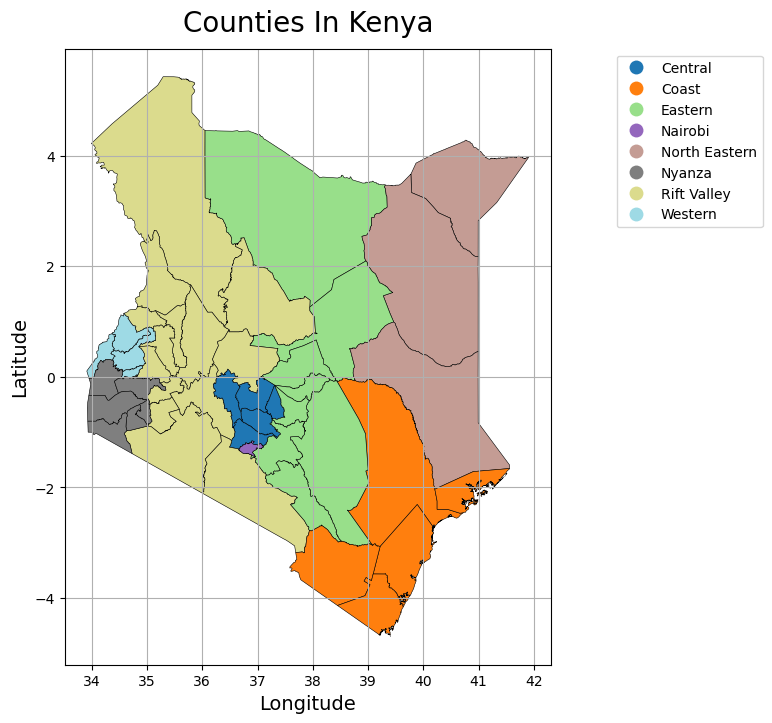

In [ ]:
# Plot all 47 counties on a map
ax = counties.plot(column = 'Region',
                        cmap='tab20',
                        figsize = (8,8),
                        legend = True,
                        edgecolor = 'black',
                        linewidth = 0.4)
                    
#add title to the map
ax.set_title('Counties In Kenya', fontdict = 
              {'fontsize':20}, pad = 12.5)
# set y and x axis labels 
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_aspect('equal', 'box')
ax.grid()

#remove the axis from the figure
#ax.set_axis_off()

#Move the legend
ax.get_legend().set_bbox_to_anchor((1.45,1.0))

#### Counties In kenya

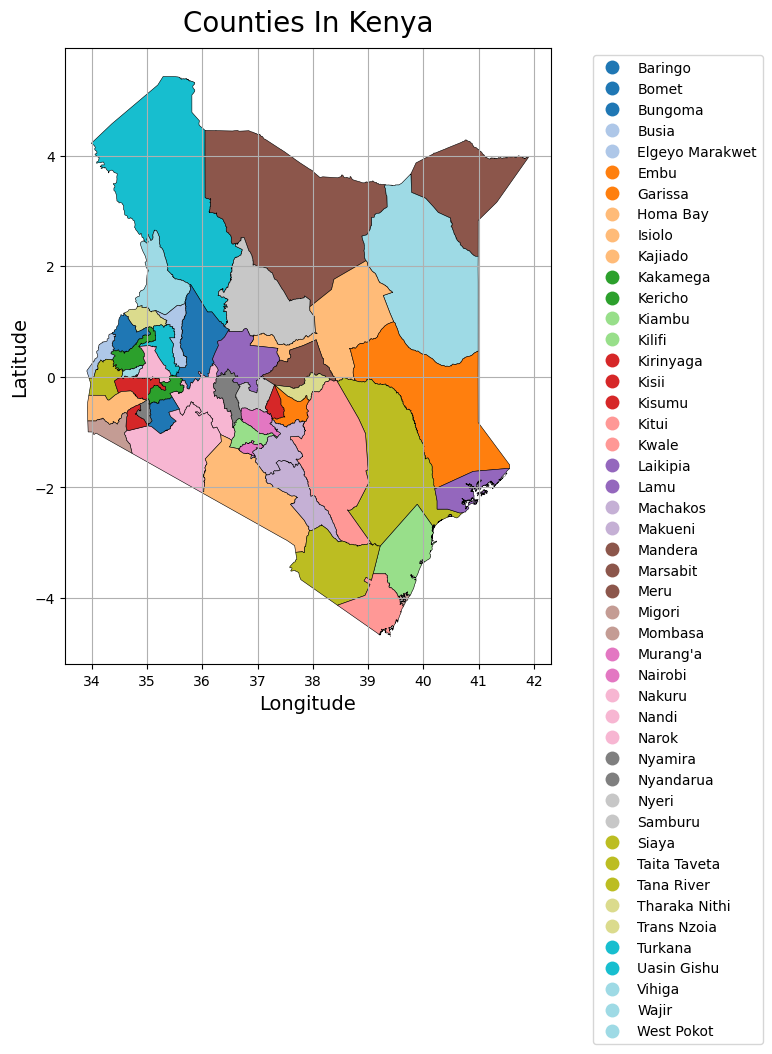

In [ ]:
# Plot all 47 counties on a map
ax = counties.plot(column = 'Name',
                        cmap='tab20',
                        figsize = (8,8),
                        legend = True,
                        edgecolor = 'black',
                        linewidth = 0.4)
                    
#add title to the map
ax.set_title('Counties In Kenya', fontdict = 
              {'fontsize':20}, pad = 12.5)
# set y and x axis labels 
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_aspect('equal', 'box')
ax.grid()

#remove the axis from the figure
#ax.set_axis_off()

#Move the legend
ax.get_legend().set_bbox_to_anchor((1.45,1.0))

### Join Attributes tables/(Merging data from the County shapefile with the covid-19 cases per county data set)

In [ ]:
#check if the counties names in both the counties shapefile  and the total_cases_per_county are similar
for items in covid_cases_per_county['County'].tolist():
    counties_list = counties['Name'].tolist()
    if items in counties_list:
        pass

    else:
        print(items + 'is not in counties_list')
    

From the code above No information was printed Out Hence all county names in both the dataframe and the geodataframe are the same. In order to merge the two dataframes there is need to have atleast one column with the same attribute data, hence the need to rename the counties column "Name" to County

In [ ]:
# Rename the column name in counties to County
counties.rename(columns = {'Name':'County'}, inplace = True)

In [ ]:
# Merge Counties geodataframe with total_cases_per_county dataframe
combined_data = counties.merge(covid_cases_per_county, on = 'County')
combined_data.head(3)

Number    County      Area         Region  Population  Households                                           geometry   Pop2019  CasesPer10K Last_Update  ...  17-Jan  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed_cases
0      23   Turkana  68680.11    Rift Valley      926976      123191  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...  926976.0    29.429025  2023-01-25  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             2728
1      10  Marsabit  70961.19        Eastern      459785       56941  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...  459785.0    21.684048  2023-01-25  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              997
2       9   Mandera  25991.47  North Eastern      867457      125497  POLYGON ((41.62133 3.97673, 41.61736 3.97482, ...  867457.0     5.406608  2023-01-25  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              469

[3 rows x 41 columns]

In [ ]:
# drop the Number column since it won't be used anywhere in the analysis
combined_data = combined_data.drop(columns = ['Number'])
combined_data.head(2)

County      Area       Region  Population  Households                                           geometry   Pop2019  CasesPer10K Last_Update  27-Dec  ...  17-Jan  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed_cases
0   Turkana  68680.11  Rift Valley      926976      123191  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...  926976.0    29.429025  2023-01-25  2728.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             2728
1  Marsabit  70961.19      Eastern      459785       56941  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...  459785.0    21.684048  2023-01-25   997.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              997

[2 rows x 40 columns]

In [ ]:
 # save the shapefile
# combined_data.to_file(r'C:\Users\PC\Music\COVID-19 Analysis\clean_data\county_covid_cases.shp')

### Exploritory Data Analysis

#### Creating a Choropleth Map
##### Plot the Distribution of Total confirmed Covid-19 Cases per county

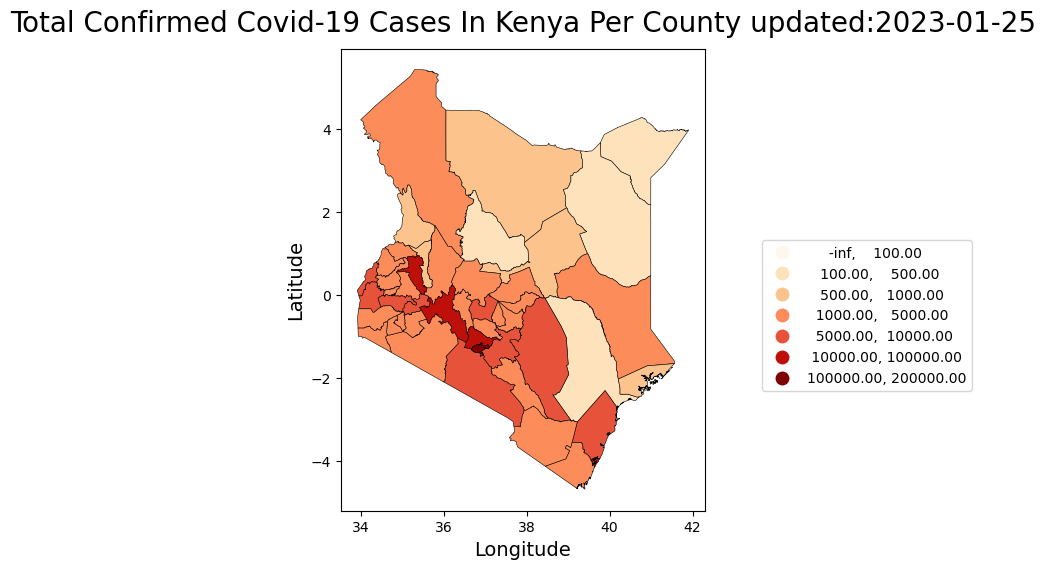

In [ ]:
#plot total confirmed COVID-19 Cases in each county
ax = combined_data.plot(column = 'Confirmed_cases',
                        cmap = 'OrRd',
                        figsize = (6,6),
                        legend = True,
                        scheme = 'user_defined',
                        classification_kwds = {'bins':[100, 500, 1000, 5000, 10000, 100000, 200000,]},
                        edgecolor = 'black',
                        linewidth = 0.4)
                    
#add title to the map
ax.set_title('Total Confirmed Covid-19 Cases In Kenya Per County updated:2023-01-25', fontdict = 
              {'fontsize':20}, pad = 12.5)  

# set y and x axis labels 
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_aspect('equal', 'box')
#ax.grid()

#remove the axis from the figure
#ax.set_axis_off()

#Move the legend
ax.get_legend().set_bbox_to_anchor((1.75,0.6))

Choropleth maps are a thematic map which shades areas of a map in relation to an aggregated statistic for a given geographic area. In this section we’ll be representing the Incidence Rate per 10, 000 people in a choropleth map. As a reminder, this statistic is the number of new cases identified for every 10, 000 people within a given area. 

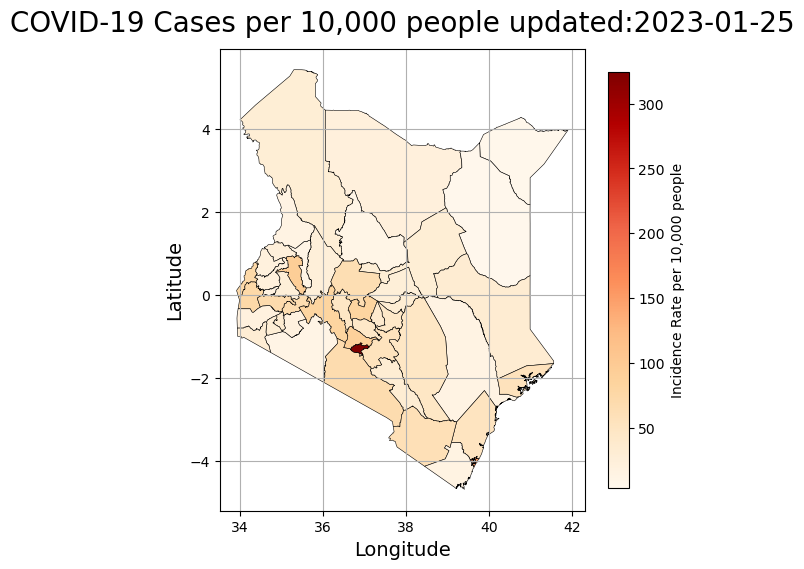

In [ ]:
#plot total confirmed COVID-19 Cases in each county
ax = combined_data.plot(column = 'CasesPer10K',
                        cmap = 'OrRd',
                        figsize = (6,6),
                        legend = True,
                        legend_kwds ={'label':'Incidence Rate per 10,000 people',
                                      'orientation':'vertical',
                                      'shrink':0.9},
            
                        edgecolor = 'black',
                        linewidth = 0.4)
                    
#add title to the map
ax.set_title('COVID-19 Cases per 10,000 people updated:2023-01-25', fontdict = 
              {'fontsize':20}, pad = 12.5)  

# set y and x axis labels 
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_aspect('equal', 'box')
ax.grid()


From the two choroppleth map you can see how the central region of Kenya Especially Nairobi are experiencing significantly higher infection rates of COVID-19 than the other regions.

## CONVERTING THE MAPS ABOVE INTO INTERACTIVE MAPS USING FOLIUM
Having the `Folium` library installed in your Python environment, allows you to easily transform your choropleth map into a dynamic visualization.All it takes is just a few simple lines of code. This library also allows you to save your interactive visual as an HTML, making it readilly available to embed.

In [ ]:
combined_data.drop(['Last_Update'], axis=1, inplace=True)

### Geocoding to add Latitude and longitude features to the geodataframe

In [ ]:
#select relevant columns
final_df =combined_data[['County','Region','Population','Area','geometry','CasesPer10K','Confirmed_cases']]
final_df.head()

County         Region  Population      Area                                           geometry  CasesPer10K  Confirmed_cases
0     Turkana    Rift Valley      926976  68680.11  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...    29.429025             2728
1    Marsabit        Eastern      459785  70961.19  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...    21.684048              997
2     Mandera  North Eastern      867457  25991.47  POLYGON ((41.62133 3.97673, 41.61736 3.97482, ...     5.406608              469
3       Wajir  North Eastern      781263  56685.75  POLYGON ((39.31812 3.47197, 39.30453 3.45582, ...     3.839936              300
4  West Pokot    Rift Valley      621241   9169.45  POLYGON ((35.12762 2.62302, 35.12240 2.61019, ...    14.503228              901

In [ ]:
for index, row in final_df.iterrows():
    
    try:
        print(row['County'])
        information = geocode(row['County'], provider ='nominatim', user_agent ='xyz', timeout = 5)

        #final_df.loc[index,'Address_2'] = information['address'].loc[0]
        final_df.loc[index, 'Longitude'] = information.geometry.loc[0].x
        final_df.loc[index, 'Latitude' ] = information.geometry.loc[0].y
        
    except TypeError:
        print('Geocoding information for'+ row['Address']+"is not found!")
        print('')

Turkana


C:\Users\PC\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\PC\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Marsabit
Mandera
Wajir
West Pokot
Samburu
Isiolo
Baringo
Elgeyo Marakwet
Trans Nzoia
Bungoma
Garissa
Uasin Gishu
Kakamega
Laikipia
Busia
Meru
Nandi
Siaya
Nakuru
Vihiga
Nyandarua
Tharaka Nithi
Kericho
Kisumu
Nyeri
Tana River
Kitui
Kirinyaga
Embu
Homa Bay
Bomet
Nyamira
Narok
Kisii
Murang'a
Migori
Kiambu
Machakos
Kajiado
Nairobi
Makueni
Lamu
Kilifi
Taita Taveta
Kwale
Mombasa


In [ ]:
#dislay the new dataframe with geocoded columns
final_df.head()

County         Region  Population      Area                                           geometry  CasesPer10K  Confirmed_cases  Longitude  Latitude
0     Turkana    Rift Valley      926976  68680.11  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...    29.429025             2728  36.074506  3.525590
1    Marsabit        Eastern      459785  70961.19  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...    21.684048              997  37.715489  2.857958
2     Mandera  North Eastern      867457  25991.47  POLYGON ((41.62133 3.97673, 41.61736 3.97482, ...     5.406608              469  40.705616  3.228533
3       Wajir  North Eastern      781263  56685.75  POLYGON ((39.31812 3.47197, 39.30453 3.45582, ...     3.839936              300  40.024494  1.939440
4  West Pokot    Rift Valley      621241   9169.45  POLYGON ((35.12762 2.62302, 35.12240 2.61019, ...    14.503228              901  35.210613  1.879861

In [ ]:
#Lets visualize the data in the gdf on a map
my_map = final_df.explore(column='County',name='County')
folium.LayerControl().add_to(my_map)

my_map

### Choropleth Map based on The total confirmed cases in each County

In [ ]:
#myscale = np.linspace(final_df['Confirmed_cases'].min(), final_df['Confirmed_cases'].max(), 20)
myscale = (final_df['Confirmed_cases'].quantile((0,0.30,0.6,1))).tolist()
#Create Kenyan Map
my_map = folium.Map(location=[-0.023559, 37.906193], zoom_start=6.0,control_scale=True)

#Add total cases choropleth to the map
folium.Choropleth(
    geo_data=final_df,
    data=final_df,
    columns=['County','Confirmed_cases'],
    key_on='feature.properties.County',
    fill_color="OrRd",
    fill_opacity=0.7,
    threshold_scale=myscale,
    line_opacity=0.5,
    legend_name="Total Confirmed Covid-19 Cases",
    name= 'Total Confirmed Covid-19 Cases In Kenya Per County updated:2023-01-25',
    reset=True,
).add_to(my_map)
folium.LayerControl().add_to(my_map)

#Add county centroid
final_df['center'] = final_df.geometry.centroid

#Add markers and pop-ups to the map
#Loop through each row in the dataframe
for row in final_df.iterrows():
    row_values = row[1]
    center_point = row_values['center']
    location = [center_point.y, center_point.x]
    popup =('<strong>'+ str(row_values['County'])+'</strong>'+ ':\n has Total confirmed cases of' 
            +'<strong>'+ '\n'+ str(row_values["Confirmed_cases"])+'</strong>')
    
    marker =folium.Marker(location=location, popup = popup)
    marker.add_to(my_map)
    


my_map

C:\Users\PC\AppData\Local\Temp\ipykernel_19276\1744903659.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  final_df['center'] = final_df.geometry.centroid
C:\Users\PC\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Heat map of confirmed COVID-19 cases Per 10,000 people in Kenya updated:2023-01-25

- `Heat mapping`, from a  GIS perspective, is a method of showing the geographic clustering of a phenomenon. Sometimes also referred as hot spot mapping, heat maps show locations of higher densities of geographic entities.
- The ‘heat’ in the term refers to the concentration of the geographic entity within any given spot for our case use the total confirmed cases per 10,000 people in all the counties.
- Heat mapping is a way of geographically visualizing locations so that patterns of higher than average occurrence of things like COVID-19 cases can emerge.

In [ ]:
#select relevant columns for the heatMap and convert them to a list
my_list = final_df[['Latitude', 'Longitude','CasesPer10K']].values.tolist()

In [ ]:
#Create the heat Map
from folium.plugins import HeatMap
m = folium.Map(location=[-0.023559, 37.906193], tiles = 'Cartodb dark_matter', zoom_start=5.5,control_scale=True)
data = my_list
HeatMap(data).add_to(m)
m

### Plot A bar chart of Top 10 Counties with the Highest number of Confirmed Covid-19 Cases 
Let's sort the combined data geodataframe by confirmed cases and see the counties with the highest confirmed covid-19 cases.

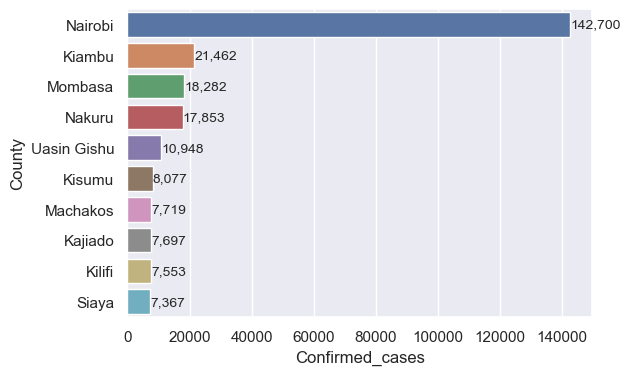

In [ ]:

#  Top 10 counties with the highest cases of COVID-19
most_affected_counties = combined_data.sort_values(by='Confirmed_cases', ascending = False).head(10)

#plot top 10 counties with highest confirmed cases using a bar graph
plt.figure(figsize=(6,4))
sns.set_theme(style="darkgrid")
plot = sns.barplot(x='Confirmed_cases', y='County', data=most_affected_counties)

for i,(value,name) in enumerate(zip(most_affected_counties['Confirmed_cases'], most_affected_counties['County'])):
    plot.text(value+1.5, i+0.1, f'{value:,.0f}', size=10)

plt.show()

### Creating A Population Density Map

In [ ]:
#Dislay a GeoDataFrame
combined_data.head(3)

County      Area         Region  Population  Households                                           geometry   Pop2019  CasesPer10K  27-Dec  28-Dec  ...  17-Jan  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed_cases
0   Turkana  68680.11    Rift Valley      926976      123191  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...  926976.0    29.429025  2728.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             2728
1  Marsabit  70961.19        Eastern      459785       56941  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...  459785.0    21.684048   997.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              997
2   Mandera  25991.47  North Eastern      867457      125497  POLYGON ((41.62133 3.97673, 41.61736 3.97482, ...  867457.0     5.406608   469.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              469

[3 rows x 39 columns]

In [ ]:
#create a population density map
combined_data['pop_dens(people/sq.km)'] = round(combined_data['Population']/combined_data['Area'])
combined_data.head(2)

County      Area       Region  Population  Households                                           geometry   Pop2019  CasesPer10K  27-Dec  28-Dec  ...  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed_cases  pop_dens(people/sq.km)
0   Turkana  68680.11  Rift Valley      926976      123191  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...  926976.0    29.429025  2728.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             2728                    13.0
1  Marsabit  70961.19      Eastern      459785       56941  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...  459785.0    21.684048   997.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              997                     6.0

[2 rows x 40 columns]

In [ ]:
combined_data.sort_values(by='pop_dens(people/sq.km)')

County      Area         Region  Population  Households                                           geometry    Pop2019  CasesPer10K    27-Dec  28-Dec  ...  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  23-Jan  24-Jan  Latest  Confirmed_cases  pop_dens(people/sq.km)
1          Marsabit  70961.19        Eastern      459785       56941  POLYGON ((36.05061 4.45622, 36.04982 4.05662, ...   459785.0    21.684048     997.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              997                     6.0
26       Tana River  38436.91          Coast      315943       47414  POLYGON ((38.76868 -0.06875, 38.75978 -0.07208...   315943.0    15.034357     475.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              475                     8.0
6            Isiolo  25336.07        Eastern      268002       31326  POLYGON ((37.94529 1.26288, 37.94816 1.19432, ...   268002.0    29.141574     781.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              781                    11.0
0           Turkana  68680.11    Rift Valley      926976      123191  POLYGON ((35.80163 5.34485, 35.79545 5.34449, ...   926976.0    29.429025    2728.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             2728                    13.0
3             Wajir  56685.75  North Eastern      781263       88574  POLYGON ((39.31812 3.47197, 39.30453 3.45582, ...   781263.0     3.839936     300.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              300                    14.0
5           Samburu  21022.27    Rift Valley      310327       47354  POLYGON ((36.73935 2.51500, 36.71409 2.50851, ...   310327.0    10.569496     328.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              328                    15.0
11          Garissa  44175.02  North Eastern      841353       98590  POLYGON ((39.31156 0.92402, 39.26593 0.87520, ...   841353.0    33.101445    2785.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             2785                    19.0
44     Taita Taveta  17084.04          Coast      340671       71090  POLYGON ((38.55026 -2.98044, 38.54430 -2.97940...   340671.0    60.498252    2061.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             2061                    20.0
42             Lamu   6273.12          Coast      143920       22184  MULTIPOLYGON (((40.71307 -2.29510, 40.71149 -2...   143920.0    56.350750     811.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              811                    23.0
2           Mandera  25991.47  North Eastern      867457      125497  POLYGON ((41.62133 3.97673, 41.61736 3.97482, ...   867457.0     5.406608     469.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0              469                    33.0
27            Kitui  30496.51        Eastern     1136187      205491  POLYGON ((38.43415 -0.07482, 38.42791 -0.07401...  1136187.0    46.471223    5280.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             5280                    37.0
39          Kajiado  21900.97    Rift Valley     1117840      173464  POLYGON ((36.33392 -1.04937, 36.34618 -1.17568...  1117840.0    68.856008    7696.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             7697                    51.0
14         Laikipia   9461.92    Rift Valley      518560      103114  POLYGON ((36.48872 0.84680, 36.47331 0.83850, ...   518560.0    64.042734    3320.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0             3321                    55.0
7           Baringo  11015.32    Rift Valley      666763      110649  POLYGON ((35.70707 1.42160, 35.70551 1.42004, ...   666763.0    25.451322    1697.0     0.0  ...     0.0     0.0     0.0     0.0     0.

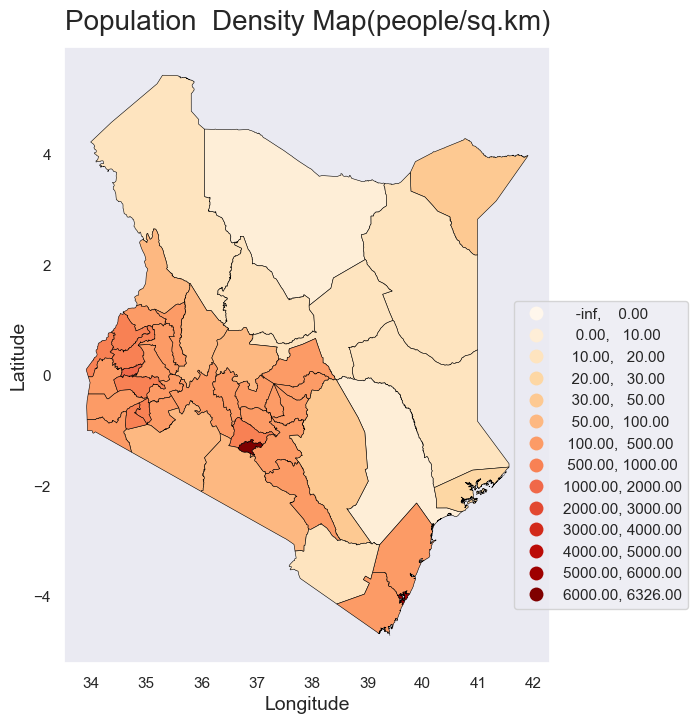

In [ ]:
## ploting
ax =combined_data.plot(column = 'pop_dens(people/sq.km)',
                   cmap = 'OrRd', 
                   figsize = (8,8),
                   legend = True,
                   scheme = 'user_defined',
                   classification_kwds = {'bins':[0, 10, 20,30,50,100,500,1000,2000,3000,4000,5000,6000,]},
                   edgecolor = 'black',
                   linewidth = 0.4)
#add title to the map
ax.set_title('Population  Density Map(people/sq.km)', fontdict = 
              {'fontsize':20}, pad = 12.5)  

# set y and x axis labels 
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_aspect('equal', 'box')
ax.grid()

#remove the axis from the figure
#ax.set_axis_off()

#Move the legend
ax.get_legend().set_bbox_to_anchor((1.3,0.6))

## General Analysis of COVID-19 in kenya

In [ ]:
covid_cases_kenya.head()

OBJECTID     Report_Date  Confirmed_New  Confirmed_Total  Recovered_New  Recovered_Total  Deaths_New  Deaths_Total  Active_Total  Tested  Tested_Total  Positive_Test_Rate
0         1  3/15/2020 0:00              0                1              0                0         0.0             0             1     NaN           NaN                 NaN
1         2  3/16/2020 0:00              0                1              0                0         0.0             0             1     NaN           NaN                 NaN
2         3  3/17/2020 0:00              2                3              0                0         0.0             0             3     NaN           NaN                 NaN
3         4  3/18/2020 0:00              0                3              0                0         0.0             0             3     NaN           NaN                 NaN
4         5  3/19/2020 0:00              4                7              0                0         0.0             0             7     NaN           NaN                 NaN

In [ ]:
covid_cases_kenya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            1047 non-null   int64  
 1   Report_Date         1047 non-null   object 
 2   Confirmed_New       1047 non-null   int64  
 3   Confirmed_Total     1047 non-null   int64  
 4   Recovered_New       1047 non-null   int64  
 5   Recovered_Total     1047 non-null   int64  
 6   Deaths_New          1046 non-null   float64
 7   Deaths_Total        1047 non-null   int64  
 8   Active_Total        1047 non-null   int64  
 9   Tested              1024 non-null   float64
 10  Tested_Total        994 non-null    float64
 11  Positive_Test_Rate  1024 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 98.3+ KB


Report_Date  is a string data type instead of a date time data type.

### Pandas To_DateTime
- Pandas .to_datetime() is a method that allows you to convert a string into DateTimes.This is Useful when working with Time series Data
- While working with time series data in Python, two things can make your life easier:
            1. Dates are in the index of the DataFrame (helps you with plotting)
            2. The columns are understood by Python as true "date" classes

`We need to do two things now:`

- Make sure that we change the dates in our dataset from "non-null object" to "non-null datetime" (i.e., change the data type of dates). This can be done using the to_datetime() function from Pandas. To make sure Python understands the date correctly, a format argument can be passed 